# Welcome to our Group Project - Milestone 3 Notebook

### Step 0 - Environment Setup

In [1]:
import os, pickle, glob
import pyspark
from pyspark.sql import SparkSession

In [2]:
sc = SparkSession.builder \
    .config("spark.driver.memory", "10g") \
    .config("spark.executor.memory", "6g") \
    .config('spark.executor.instances', 19) \
    .getOrCreate()

### Step 1 - Loading dataset (Please skip to Step 2)

Someone removed all my previous work, including the data and preprocessing/exlporation notebook. So we get to do that all over again here.

In [3]:
# Run this section only to download the dataset the first time
import gdown

# This is taking in the google drive file ID for each BIOMEDICA file we want to upload
parquet_files = [
    "12ZvsKXcPKDo3QWBU3_MH4zKG_mp4AU2q", 
    "1js9jjq6_sED0iCJ7XyYm5nT6OZKnZrB6", 
    "1fvNnt5FFJvl_sDbhDRPmlLqnD5xaU_Eu", 
    "1AuZHBpehRQD_1F2JJZj4OlSnHx39qJwm", 
    "1zPNEXEtESsb1jR4SxFFKAHM6EHwa4aEp", 
    "1h_6aYEHUKoYjsiiSdFjbn0Qjn2KFtd30",
    "1oHvnsmdiBnt2Y2tCHHtLc6IIeORkYs-Z", 
    "1JOAFyfPTA9Ougr6-SIQCT3wGosJOBuHN",
    "1lwsZwRw9kv2KbOFP-64sXyUgts5YbG3F", 
    "19SjlTxWAXjoao9mfpIntShk_qd-4Dlym", 
    "1JYHLj6WynqVl2X2g9zdYHlMqlotyUj61",
    "1_0KtcvJKhLvWRuTCncnHJJB02juVtMO0",
    "108QyrKdDZRbRCxQimd6wNYp-WWtX4hUz",
    "1LLSjw138Uyim3jGDZvJiarntrcdryOOe",
    "1X-BBSszY6n67zchWa6tLC7ZBuo8dN9Yv",
    "1qVukEWT7SmQ7CLVTrSHEUPrFx0bunILx",
    "1jUtSoht5nD5S0GdD3LaDrr7_Nvcr11rT",
    "1LL6oOs0K6serggFaF_GaGw02uDvcylSE",
    "1OXNIaFGcrBMl5i3f_y2j-H_gks5M4Log",
    "1DI66r9ic_zacDwL4jIJww6IG3M6jfx6m",
    "1oGanekYhzt7ZMV72n7tRceNcj1od7eMW",
]

# Download all files listed above
for fid in parquet_files:
    gdown.download(f"https://drive.google.com/uc?id={fid}", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=12ZvsKXcPKDo3QWBU3_MH4zKG_mp4AU2q
From (redirected): https://drive.google.com/uc?id=12ZvsKXcPKDo3QWBU3_MH4zKG_mp4AU2q&confirm=t&uuid=498129fe-3431-4609-8d7d-682026467cf5
To: /home/ntorno/group_project/train-00000-of-00016-46dd69ab3f79b370.parquet
100%|██████████| 346M/346M [00:05<00:00, 64.8MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1js9jjq6_sED0iCJ7XyYm5nT6OZKnZrB6
From (redirected): https://drive.google.com/uc?id=1js9jjq6_sED0iCJ7XyYm5nT6OZKnZrB6&confirm=t&uuid=611c5e5b-d730-4df7-b1db-5efbc3506c68
To: /home/ntorno/group_project/train-00000-of-00140-734d6ddb1e9e1773.parquet
100%|██████████| 453M/453M [00:06<00:00, 71.6MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1fvNnt5FFJvl_sDbhDRPmlLqnD5xaU_Eu
From (redirected): https://drive.google.com/uc?id=1fvNnt5FFJvl_sDbhDRPmlLqnD5xaU_Eu&confirm=t&uuid=54f5ecce-4979-48c2-b33a-275db7c5cfe6
To: /home/ntorno/group_project/train-00000-

In [5]:
# We first have to create a local path before saving files to the remote directory
import os

base_dir = os.path.expanduser('~/group_project/parquet_data')

# Create the directory
os.makedirs(base_dir, exist_ok = True)

In [8]:
# Make sure the parquet files are in the new directory
import os
print(os.listdir(os.path.expanduser('~/ntorno/group_project/')))

['train-00003-of-00250-0a15192a19f12469.parquet', 'train-00004-of-00250-5f4359daa20f137d.parquet', 'train-00002-of-00140-d69dd45872f01703.parquet', 'BIOMEDICA___biomedica_histopathology_subset_parquet', 'train-00004-of-00140-3d83247fdfa22fb5.parquet', 'Milestone_3.ipynb', 'train-00005-of-00140-83dc3adb75a2ceab.parquet', '_home_ntorno_group_project_BIOMEDICA___biomedica_histopathology_subset_parquet_default_0.0.0_b7b86b71823e47f25e18a8bbbd0195292d930802.lock', 'train-00003-of-00016-2fb25a8f96da7736 (1).parquet', 'train-00006-of-00016-aa7ec17a16dbf016.parquet', 'train-00005-of-00016-939cef8ffe848057.parquet', 'train-00003-of-00140-3a63e47707fed41b.parquet', 'train-00001-of-00140-e137d78bfa2fb7b1.parquet', '.ipynb_checkpoints', 'train-00002-of-00016-3a461b7b2d37d5fd.parquet', 'train-00000-of-00140-734d6ddb1e9e1773.parquet', 'train-00001-of-00250-94a6ed5a243595ce.parquet', 'train-00006-of-00250-309c61a911187d72.parquet', 'train-00002-of-00250-c11203f7e7450eba.parquet', 'train-00005-of-0025

In [12]:
parquet_dir = os.path.expanduser('~/ntorno/group_project/')

# Load all parquet files in this directory
parquet_files = parquet_dir + "/*.parquet" 
df = sc.read.parquet(parquet_files)

In [13]:
df.count()

34945

In [14]:
# Save combined dataframe
output_dir = os.path.expanduser('~/group_project/parquet_datasets/biomedica_histopathology')
df.write.mode('overwrite').parquet(output_dir)

### Step 2 - Preprocess Data for CNN

Please note that this skips over the exploratory analysis because that was included in Milestone 2. Please check your working directory before proceeding as you may have to use a different file path if you are working in a cloned directory. You can check your working directory in terminal using pwd before proceeding.

In [3]:
# Load the data
# PLEASE NOTE
# If you accessing this project in a cloned directory, you should skip this cell and use the path in the following cell instead
data = sc.read.parquet(os.path.expanduser('~/group_project/parquet_datasets/biomedica_histopathology'))

In [ ]:
# If you are not working directly in this path: /expanse/lustre/projects/uci150/ntorno/group_project
# For example, your path might look like "~/your_name/notrno/group_project" if you cloned this project into your directory
# Please load the data using this code instead
# data = sc.read.parquet(os.path.expanduser('~/ntorno/group_project/parquet_datasets/biomedica_histopathology'))

In [4]:
# Sanity check
data.count()

34945

In [5]:
data.printSchema

<bound method DataFrame.printSchema of DataFrame[image: struct<bytes:binary,path:string>, caption: string, image_id: string, image_cluster_id: string, image_hash: string, image_file_name: string, image_panel_type: string, image_panel_subtype: string, image_primary_label: array<string>, image_secondary_label: array<string>, image_size: array<int>, image_figure_set: string, image_context: string, article_title: string, article_keywords: array<string>, article_journal: string, article_date: string, article_abstract: string, article_mesh_terms: array<string>, subset: string, pmid: string, article_reference_ids: array<string>, article_reference_count: string, article_reference_list: array<string>, article_citation: string, article_license: string]>

In [21]:
# We are beginning with a small local test
sample_data = data.select("image.bytes", "image_primary_label").limit(1000)

In [25]:
# %pip install tensorflow

In [26]:
# Image data preprocessing
import numpy as np
from PIL import Image
import io
from tensorflow.keras.utils import to_categorical

def decode_and_resize(img_bytes, target_size = (128, 128)):
    img = Image.open(io.BytesIO(img_bytes)).convert('RGB')
    img = img.resize(target_size)
    return np.array(img)

rows = sample_data.collect()

X_list = []
y_list = []

for row in rows:
    try:
        img_bytes = row['bytes']
        img_array = decode_and_resize(img_bytes)
        X_list.append(img_array)
        
        label = row['image_primary_label'][0] if row['image_primary_label'] else 'unknown'
        y_list.append(label)
    except:
        pass

X = np.stack(X_list)

In [27]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_list)

# Convert to one-hot vectors 
num_classes = len(label_encoder.classes_)
y = to_categorical(y_encoded, num_classes=num_classes)

In [28]:
# Scale pixel values for better performance
X = X.astype('float32') / 255.0

Test toy CNN - I'm really just checking that tensorflow downloaded properly here

In [29]:
# Pyspark Mlib does not support CNNs directly, so we will use tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models

input_shape = X.shape[1:]  # e.g. (128, 128, 3)

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/home/ntorno/.local/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [31]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify = y_encoded)

In [32]:
# Train the model
model.fit(X, y, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/s

In [33]:
# Evaluate the model accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Loss: 0.0000
Test Accuracy: 1.0000


In [35]:
# Classification report
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Label names
class_names = label_encoder.classes_

# Classification report
print(classification_report(y_true, y_pred, target_names = class_names))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
              precision    recall  f1-score   support

  Microscopy       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### Step 3 - Build, Train, and Evaluate CNN Model

In [6]:
unique_article_count = data.select('article_title').distinct().count()
print(f"Number of unique articles: {unique_article_count}")

Number of unique articles: 28644


In [7]:
unique_articles = data.select('article_title').distinct()
unique_articles.show(10, truncate = False)

+-------------------------------------------------------------------------------------------------------------------------------------------------+
|article_title                                                                                                                                    |
+-------------------------------------------------------------------------------------------------------------------------------------------------+
|Bronchiolitis Obliterans Organizing Pneumonia in Swine Associated with Porcine Circovirus Type 2 Infection                                       |
|Comparison of pain behaviour and osteoarthritis progression between anterior cruciate ligament transection and osteochondral injury in rat models|
|Involvement of Endoplasmic Reticulum Stress in Myocardial Apoptosis of Streptozocin-Induced Diabetic Rats                                        |
|Survey of Supervised Learning for Medical Image Processing                                                     

In [8]:
unique_journal_count = data.select('article_journal').distinct().count()
print(f"Number of unique journals: {unique_journal_count}")

Number of unique journals: 3044


In [9]:
unique_journals = data.select('article_journal').distinct()
unique_journals.show(10, truncate = False)

+--------------------------+
|article_journal           |
+--------------------------+
|Environ Sci Pollut Res Int|
|Clin Med Insights Case Rep|
|Vasc Health Risk Manag    |
|ACS Chem Biol             |
|Appl Environ Microbiol    |
|Ann Anat                  |
|Clin Ophthalmol           |
|Int J Med Sci             |
|Cancer Biol Med           |
|Int J Parasitol           |
+--------------------------+
only showing top 10 rows



In [10]:
# %pip install "numpy<2.0"

In [11]:
import numpy as np
print(np.__version__)

1.26.4


In [12]:
# Image data preprocessing
from PIL import Image
import io
from tensorflow.keras.utils import to_categorical

def decode_and_resize(img_bytes, target_size=(128, 128)):
    img = Image.open(io.BytesIO(img_bytes)).convert('RGB')
    img = img.resize(target_size)
    return np.array(img)

X_list = []
y_list = []

for row in data.toLocalIterator():
    try:
        img_bytes = row.image.bytes 
        img_array = decode_and_resize(img_bytes)
        X_list.append(img_array)

        label = row.article_journal[0] if row.article_journal else 'unknown'
        y_list.append(label)
    except Exception as e:
        print(f"Skipping row due to error: {e}")
        continue

X = np.stack(X_list)

Matplotlib created a temporary cache directory at /scratch/ntorno/job_40003231/matplotlib-wrqiljwy because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [13]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_list)

# Convert to one-hot vectors 
num_classes = len(label_encoder.classes_)
y = to_categorical(y_encoded, num_classes = num_classes)

In [14]:
# Scale pixel values for better performance
X = X.astype('float32') / 255.0

In [16]:
# Pyspark Mlib does not support CNNs directly, so we will use tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models

input_shape = X.shape[1:]

model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(32, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

/home/ntorno/.local/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [17]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify = y_encoded)

In [19]:
# Train the model
model.fit(X, y, epochs = 13, batch_size = 32, validation_split = 0.2)

Epoch 1/13
874/874 ━━━━━━━━━━━━━━━━━━━━ 124s 139ms/step - accuracy: 0.1306 - loss: 3.0518 - val_accuracy: 0.1408 - val_loss: 2.8673
Epoch 2/13
874/874 ━━━━━━━━━━━━━━━━━━━━ 122s 139ms/step - accuracy: 0.1636 - loss: 2.8143 - val_accuracy: 0.1468 - val_loss: 2.8387
Epoch 3/13
874/874 ━━━━━━━━━━━━━━━━━━━━ 126s 144ms/step - accuracy: 0.1757 - loss: 2.7428 - val_accuracy: 0.1439 - val_loss: 2.8692
Epoch 4/13
874/874 ━━━━━━━━━━━━━━━━━━━━ 126s 144ms/step - accuracy: 0.2311 - loss: 2.5459 - val_accuracy: 0.1366 - val_loss: 3.0161
Epoch 5/13
874/874 ━━━━━━━━━━━━━━━━━━━━ 126s 144ms/step - accuracy: 0.3484 - loss: 2.1557 - val_accuracy: 0.1173 - val_loss: 3.5397
Epoch 6/13
874/874 ━━━━━━━━━━━━━━━━━━━━ 133s 153ms/step - accuracy: 0.5059 - loss: 1.6296 - val_accuracy: 0.1117 - val_loss: 4.2498
Epoch 7/13
874/874 ━━━━━━━━━━━━━━━━━━━━ 126s 144ms/step - accuracy: 0.6702 - loss: 1.1141 - val_accuracy: 0.1017 - val_loss: 5.6071
Epoch 8/13
874/874 ━━━━━━━━━━━━━━━━━━━━ 129s 147ms/step - accuracy: 0.7919 -

In [20]:
# Evaluate the model accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7980 - loss: 2.5869
Test Loss: 2.5216
Test Accuracy: 0.7988


In [47]:
# Classification report
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Label names
class_names = label_encoder.classes_

# Classification report
print(classification_report(y_true, y_pred, target_names = class_names))

219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step
              precision    recall  f1-score   support

           A       0.74      0.80      0.77       634
           B       0.80      0.71      0.75       471
           C       0.77      0.79      0.78       492
           D       0.74      0.81      0.78       199
           E       0.84      0.82      0.83       266
           F       0.82      0.77      0.80       321
           G       0.91      0.82      0.86        76
           H       0.82      0.75      0.78       118
           I       0.78      0.85      0.81       582
           J       0.78      0.85      0.81       997
           K       0.92      0.85      0.88        66
           L       0.91      0.83      0.87        90
           M       0.76      0.84      0.80       565
           N       0.85      0.83      0.84       360
           O       0.84      0.79      0.82       239
           P       0.86      0.77      0.81       595
           Q       0.67      0.40      

In [43]:
#!apt-get update && apt-get install graphviz -y

Reading package lists... Done
E: List directory /var/lib/apt/lists/partial is missing. - Acquire (30: Read-only file system)


In [45]:
# model diagram
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,188,185 (84.64 MB)

 Trainable params: 7,396,061 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,792,124 (56.43 MB)

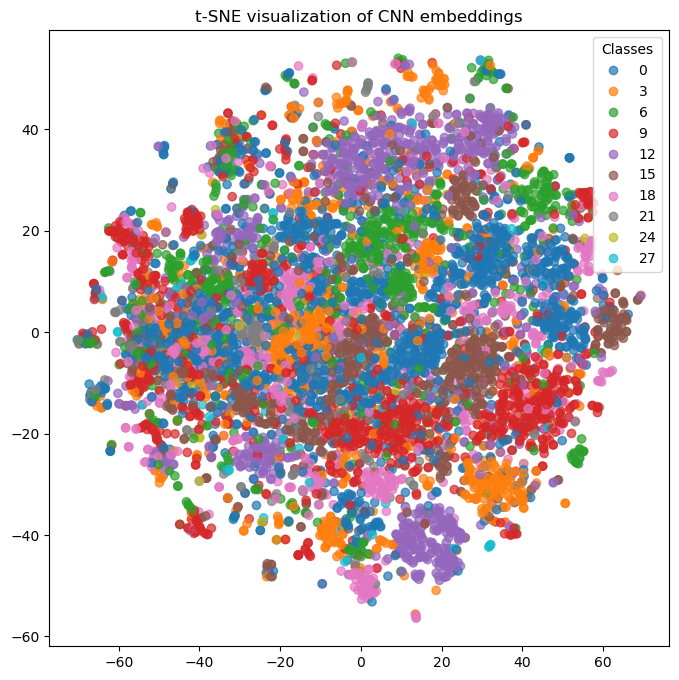

In [52]:
# TSNE 
import numpy as np
from tensorflow.keras.models import Model
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assume X_test is your input data (numpy array)
intermediate_output = X_test
for layer in model.layers[:-1]:  # exclude last layer (classifier)
    intermediate_output = layer(intermediate_output)

features = intermediate_output.numpy() if hasattr(intermediate_output, 'numpy') else intermediate_output

# Now run t-SNE on features
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components = 2, random_state = 42)
features_2d = tsne.fit_transform(features)

labels = np.argmax(y_test, axis = 1)
plt.figure(figsize = (8,8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c = labels, cmap = 'tab10', alpha = 0.7)
plt.legend(*scatter.legend_elements(), title = "Classes")
plt.title("t-SNE visualization of CNN embeddings")
plt.show()

### Step 4 - Consider the fitting graph

Because this model achieved over 96.6% training accuracy but only 81% test accuracy, it can be said that the model is in the overfitting section of the model fitting graph. Because the model seems to be overfitting in training, future training considerations will include hyperparameter tuning focused on the learning rate, batch size, and experimenting with different sizes of C to mitigate overfitting. It is not entirely surprising that overfitting is present because the data is so highly dimensional; the model may be able to learn patterns in the training set well at the expense of being able to generalize to new data in the test set.

### Step 5 - What next models are you thinking of and why?

In addition to the hyperparameter tuning mentioned above, one additional model we will implement is a journal cluster based model; we will first use a clustering algorithm to organize journals into similar groups, then use the group labels as the prediction variable instead of the unique journal titles to train the CNN. Because there are over 3,000 different journals represented in the dataset, it is possible that hyperparameter tuning alone may not be enough to overcome how complex the prediction task is. Another option worth pursuing is to leverage the MobileNetV2 model, which is a highly robust pretrained CNN optimized for efficient image classification. More specifically, we will employ transfer learning, meaning the MobileNetV2 model will be combined with information from our dataset by retraining some layers of the model, creating a customizer predictor while still benefitting from the pretrained model. 

### Step 6 - Update README

This has been done, and the updated information can be viewed in the main branch on GitHub as well as in the Milestone3 branch.

### Step 7 - Conclusion Section

The first model is a successful initial attempt to leverage the BIOMEDICA database to predict which medical journal histopathological images belong to. The model achieved over 96% testing accuracy but 81% testing accuracy, revealing the need for further optimization. This optimization will be addressed in future work using a three-pronged approach: (1) employ hyperparameter tuning of the learning rate, batch size, and C, (2) cluster the journals before training the CNN, and (3) employ transfer learning with the MobileNetV2 model. We recognize that it is entirely possible that these approaches may yield varying degrees of success; for example, hyperparameter tuning is important, but it will never make up for using the wrong model initially. Our group's decision to employ a three-pronged approach to model optimization comes from the desire to try multiple different options and compare the results. This will give us the best chance of creating a strong model without leaving so many "what-ifs" at the end of the project.